'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0            NOVA
1            PMFS
2    HUNTER-FSYNC
3          HUNTER
Name: file_system, dtype: object


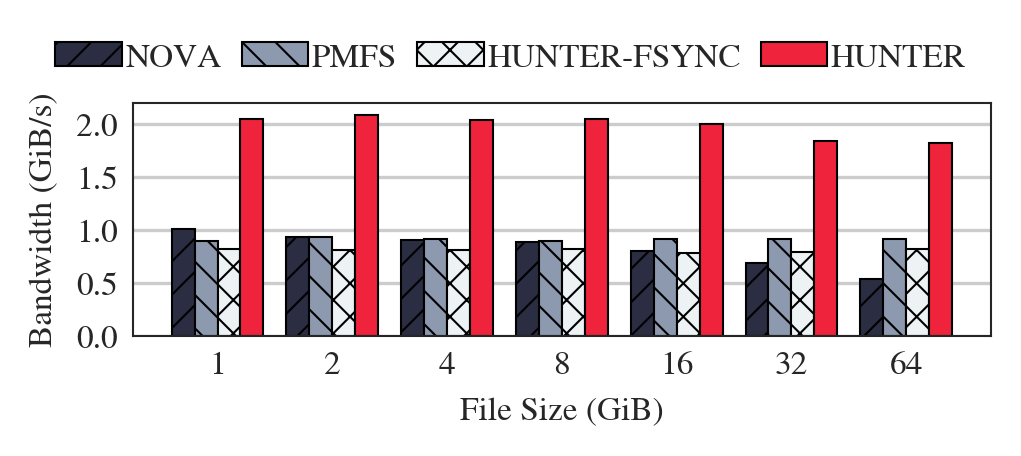

In [2]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))
bar_width = 0.2
subfig_titles = ["(a) 0% dup ratio", "(b) 25% dup ratio", "(c) 50% dup ratio", "(d) 75% dup ratio"]
patterns = ['///', '\\\\\\', 'XXX', '']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c"]

x = [1, 2, 3, 4, 5, 6, 7]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
tot = len(fss) * bar_width
print(fss)
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    plt.bar(points, df[df['file_system'] == fs]['bandwidth(MiB/s)'] / 1024, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx], linewidth=0.5)

# Draw title
plt.xticks(x, labels=[1, 2, 4, 8, 16, 32, 64], fontsize=8)
plt.yticks([0, 0.5, 1, 1.5, 2], fontsize=8)
plt.ylim(0, 2.2)
plt.ylabel('Bandwidth (GiB/s)', fontsize=8)
plt.xlabel("File Size (GiB)", fontsize=8) 
            
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8, columnspacing=0.6, labelspacing=0.1, handletextpad=0.1)
ax = fig.gca()
lw = 0.5
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)
plt.tight_layout()
plt.savefig("./FIG-Filesize.pdf", bbox_inches='tight', pad_inches=0)
